## Objective : To classify the species of iris flower on the basis of data.

In [1]:
# Importing some necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [2]:
## Reading the data.

In [3]:
df = pd.read_csv('/Users/mohdsaquib/downloads/iris/Iris.csv')

In [4]:
## Getting the head of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## Getting the columns of data set
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
## Renaming my columns name
df.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth'},inplace=True)

In [7]:
df.describe()

,Id,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 6)

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### 2-D Scatter plot

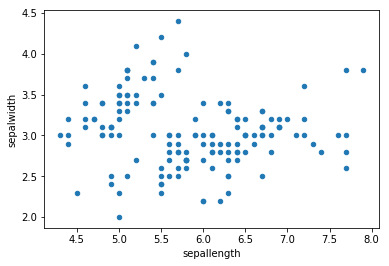

In [10]:
df.plot(kind='scatter',x='sepallength',y='sepalwidth')
plt.show()

In [11]:
### We cannot make much sense out of it

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


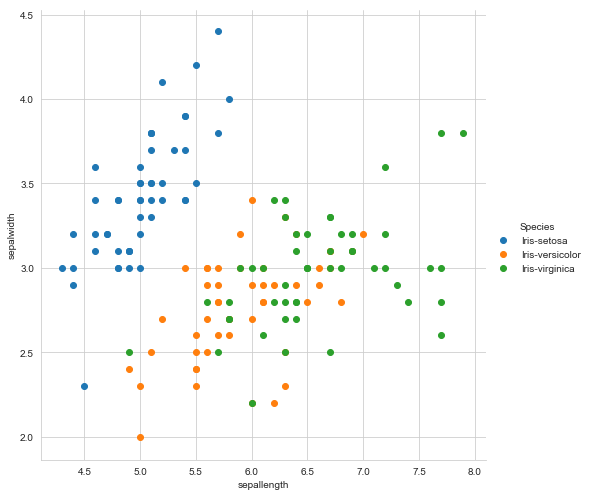

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Species",size=7) \
   .map(plt.scatter, "sepallength","sepalwidth") \
   .add_legend();
plt.show()

## 3-D plot needs a lot of mouse interaction.
What about 4-D, 5-D, or n-D scatter plot?

## Pair - plot

In [13]:
del df['Id']

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


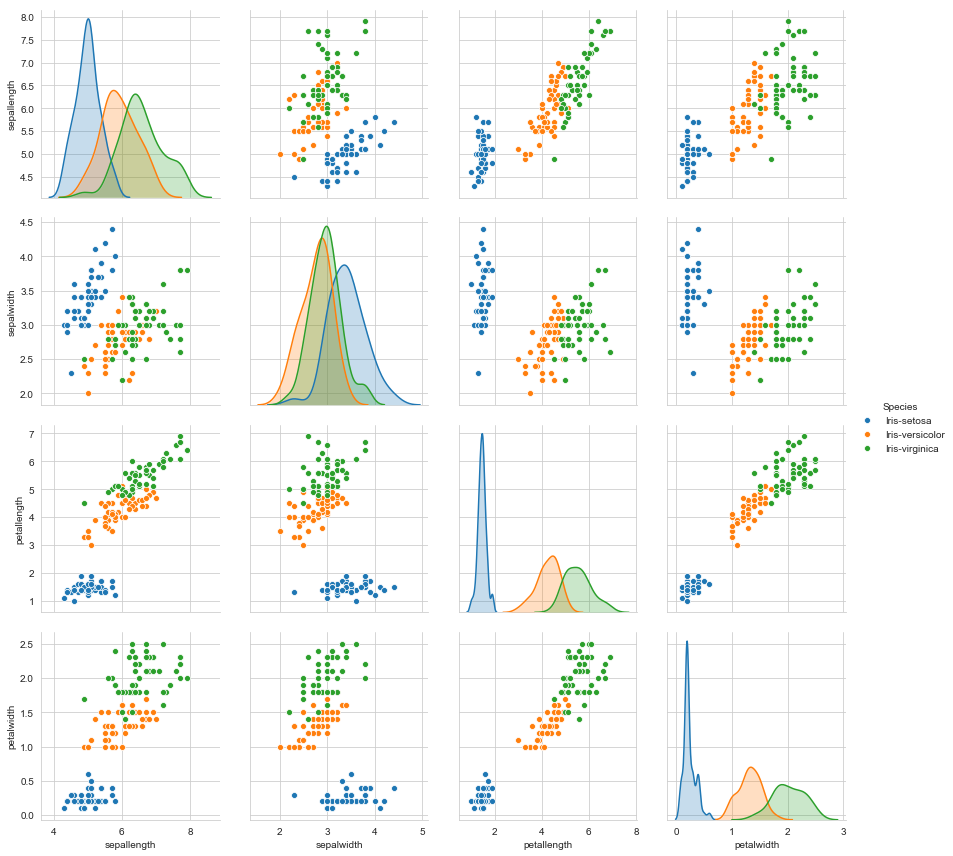

In [14]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="Species",height=3);
plt.show()

1). petal_length and petal_width are the most useful features to identify various flower types.

2). While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

3). We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## Histogram, PDF

#### A histogram is a bar graph of raw data that creates a picture of the data distribution. The bars represent the frequency of occurrence by classes of data. A histogram shows basic information about the data set, such as central location , width of spread , and shape.
#### PDF ( Probability Density Function) - The smoothed form of histogram is called as PDF.

In [15]:
import numpy as np
iris_setosa = df.loc[df["Species"]=="Iris-setosa"];
iris_virginica = df.loc[df["Species"]=="Iris-virginica"];
iris_versicolor = df.loc[df["Species"]=="Iris-versicolor"]


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


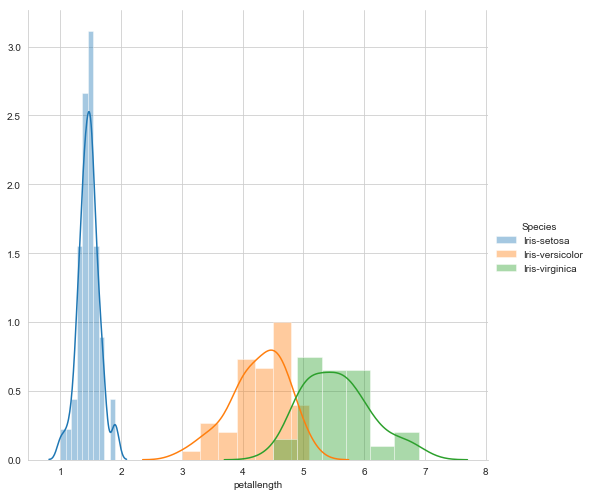

In [16]:
sns.FacetGrid(df,hue="Species",size=7)\
   .map(sns.distplot,"petallength")\
   .add_legend();
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


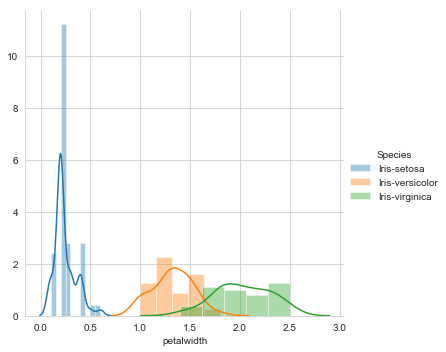

In [17]:
sns.FacetGrid(df, hue="Species",size=5)\
   .map(sns.distplot,"petalwidth")\
   .add_legend();
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


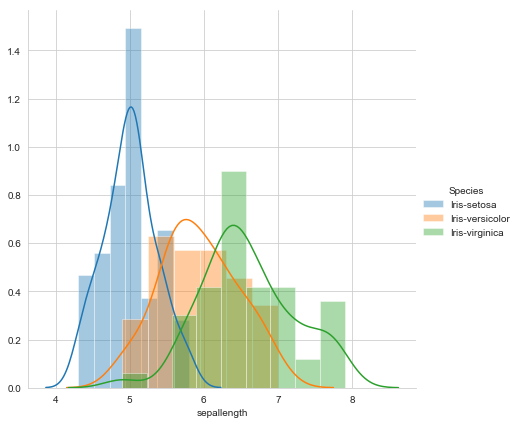

In [18]:
sns.FacetGrid(df,hue="Species",size=6)\
   .map(sns.distplot,"sepallength")\
   .add_legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


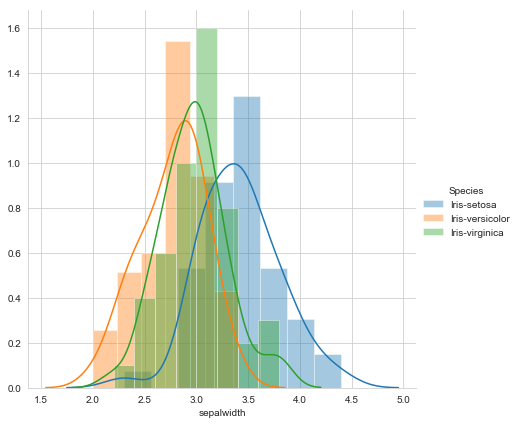

In [19]:
sns.FacetGrid(df,hue="Species",height=6)\
   .map(sns.distplot,"sepalwidth")\
   .add_legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


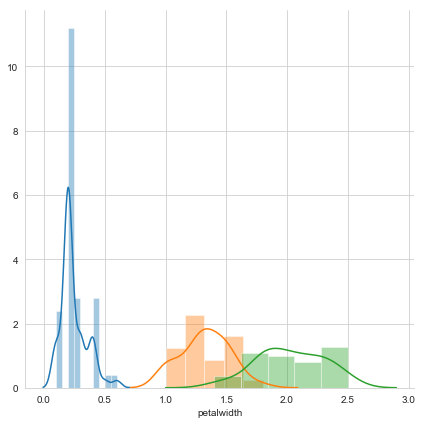

In [20]:
sns.FacetGrid(df,hue="Species",height=6)\
   .map(sns.distplot,"petalwidth")

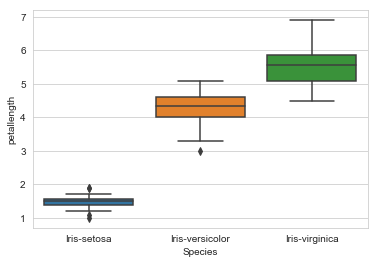

In [21]:
# Box Plot

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='petallength', data=df)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


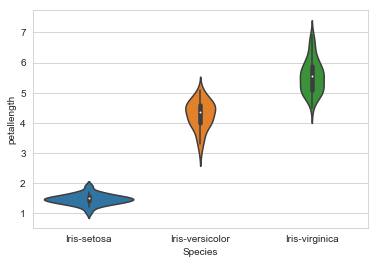

In [22]:
#Violen plot
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="petallength", data=df, height=8)
plt.show()